In [1]:
# --- Cell 1: imports ---
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


In [2]:
# --- Cell 2: paths (run from inside "data/" folder) ---
ROOT = "."          # you are in data/
DIR2D = os.path.join(ROOT, "2d")

NODES_CSV = os.path.join(DIR2D, "nodes.csv")
CELLS_CSV = os.path.join(DIR2D, "cells.csv")

CENT_DIR = os.path.join(DIR2D, "centroidi", "Funzione_test")
CENT_FILES = sorted(glob.glob(os.path.join(CENT_DIR, "Funzione_test_*.csv")))

OBS_DIR = os.path.join(DIR2D, "Funzione_test")
OBS_FILES = sorted(glob.glob(os.path.join(OBS_DIR, "*.csv")))

print("Centroid files:")
for f in CENT_FILES:
    print("  ", f)

print("\nObservation candidate files in 2d/Funzione_test/:")
for f in OBS_FILES:
    print("  ", f)


Centroid files:
   ./2d/centroidi/Funzione_test/Funzione_test_0.csv
   ./2d/centroidi/Funzione_test/Funzione_test_1.csv

Observation candidate files in 2d/Funzione_test/:
   ./2d/Funzione_test/Funzione_test_0.csv
   ./2d/Funzione_test/Funzione_test_1.csv


In [3]:
# --- Cell 3: load mesh and build triangulation ---
nodes = np.loadtxt(NODES_CSV, delimiter=",")
cells = np.loadtxt(CELLS_CSV, delimiter=",", dtype=int)

x = nodes[:, 0]
y = nodes[:, 1]
tri = mtri.Triangulation(x, y, cells)

print("nodes:", nodes.shape, "cells:", cells.shape)


nodes: (961, 2) cells: (1800, 3)


In [4]:
# --- Cell 4: plotting helper ---
def plot_on_mesh(values, title="", levels=50):
    values = np.asarray(values).reshape(-1)
    assert values.shape[0] == x.shape[0], f"Expected {x.shape[0]} values, got {values.shape[0]}"

    plt.figure(figsize=(6, 5))
    cf = plt.tricontourf(tri, values, levels=levels)
    plt.colorbar(cf)
    plt.title(title)
    plt.axis("equal")
    plt.tight_layout()
    plt.show()


Loaded centroid file: ./2d/centroidi/Funzione_test/Funzione_test_0.csv shape: (3, 961)


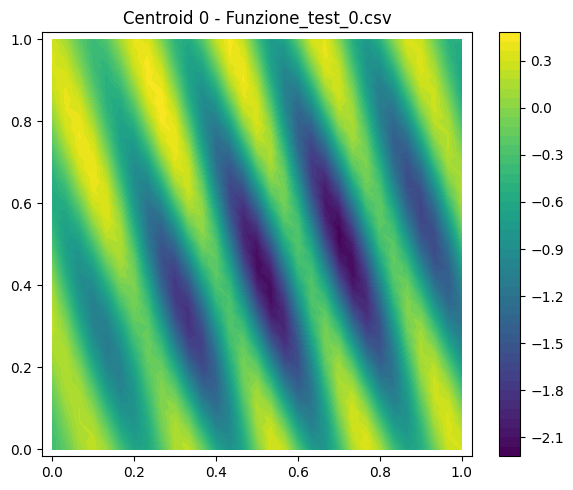

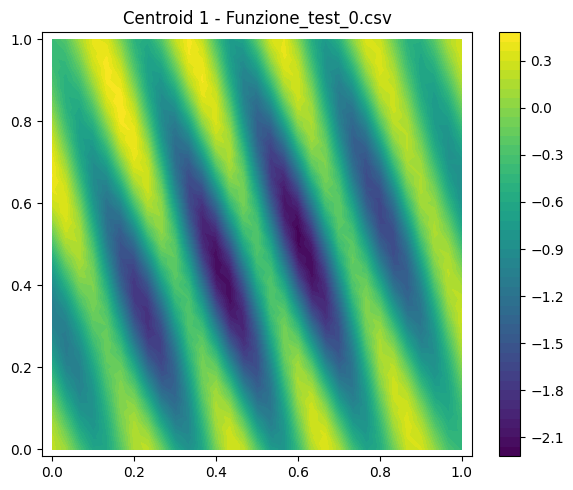

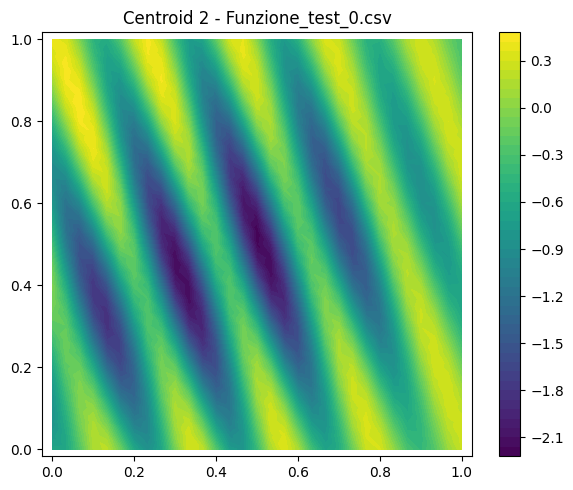

In [5]:
# --- Cell 5: plot ALL centroids from a centroid file ---
# Each centroid file should be: (k x n_nodes) OR (n_nodes,) if only one centroid
centroid_file = CENT_FILES[0]  # e.g. Funzione_test_0.csv 
C = np.loadtxt(centroid_file, delimiter=",")

print("Loaded centroid file:", centroid_file, "shape:", C.shape)

if C.ndim == 1:
    plot_on_mesh(C, title=f"Centroid (single) from {os.path.basename(centroid_file)}")
else:
    for k in range(C.shape[0]):
        plot_on_mesh(C[k, :], title=f"Centroid {k} - {os.path.basename(centroid_file)}")


In [6]:
# --- Cell 7: load an observation dataset file (choose one) ---
# If you know exactly which one you want, set OBS_FILE manually.
# Otherwise pick the first CSV in the folder.
if len(OBS_FILES) == 0:
    raise FileNotFoundError("No CSV files found in 2d/Funzione_test/. Run `ls 2d/Funzione_test` and check paths.")

OBS_FILE = OBS_FILES[0]  # change this if needed
Y = np.loadtxt(OBS_FILE, delimiter=",")

print("Loaded observation file:", OBS_FILE)
print("Y shape:", Y.shape, "(n_obs x n_nodes) expected")


Loaded observation file: ./2d/Funzione_test/Funzione_test_0.csv
Y shape: (90, 961) (n_obs x n_nodes) expected


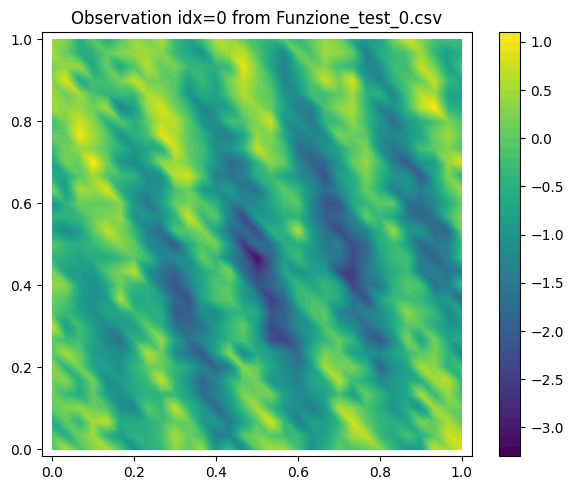

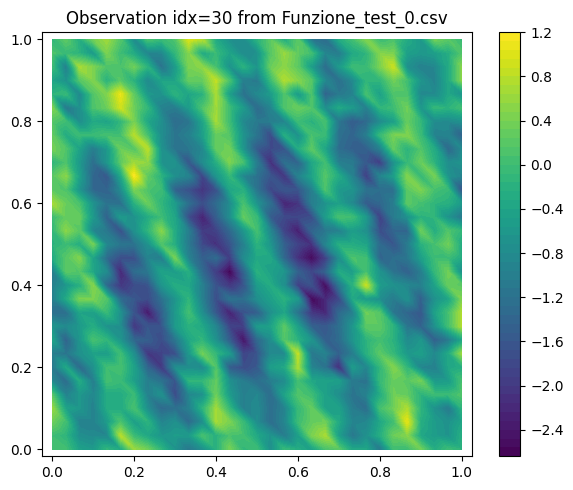

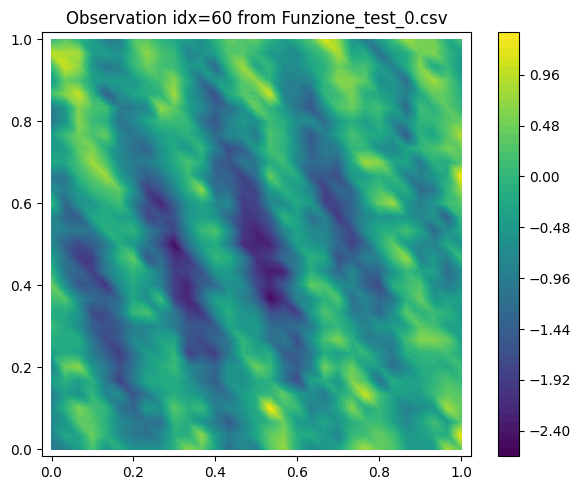

In [7]:
# --- Cell 8: plot chosen observations ---
# Put here the row indices you want to visualize
idx_to_plot = [0, 30, 60]   # EDIT: choose whatever you want

for idx in idx_to_plot:
    plot_on_mesh(Y[idx, :], title=f"Observation idx={idx} from {os.path.basename(OBS_FILE)}")


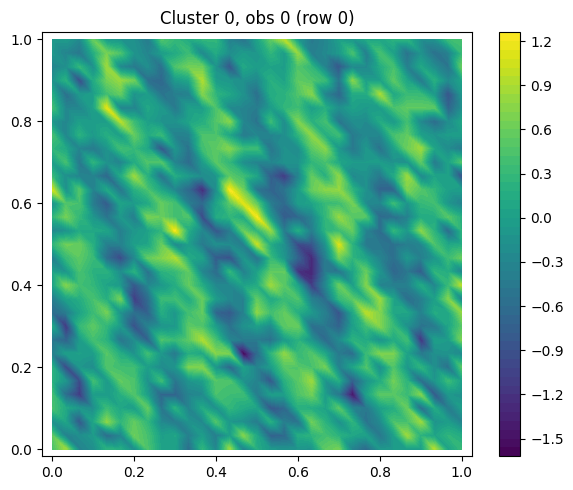

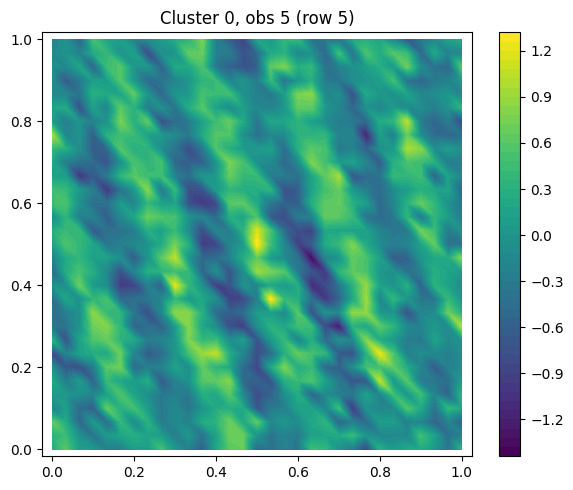

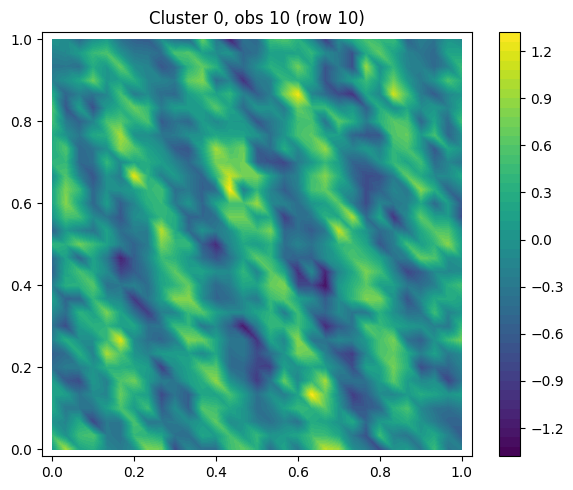

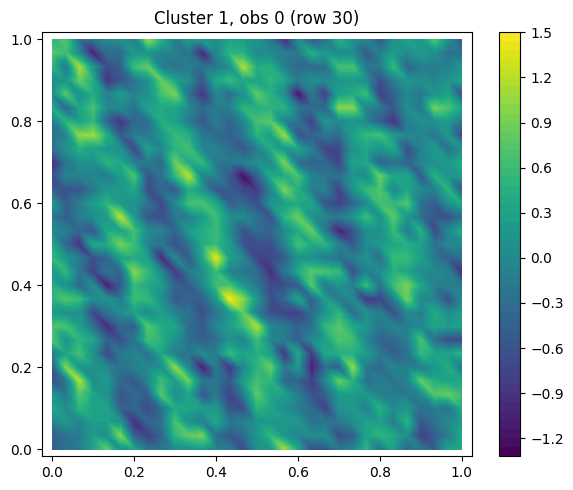

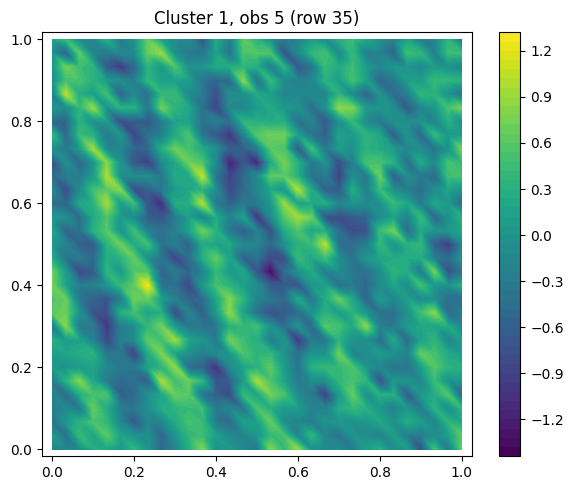

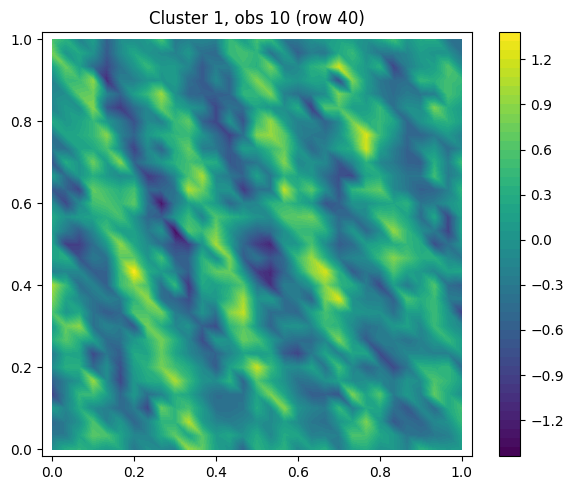

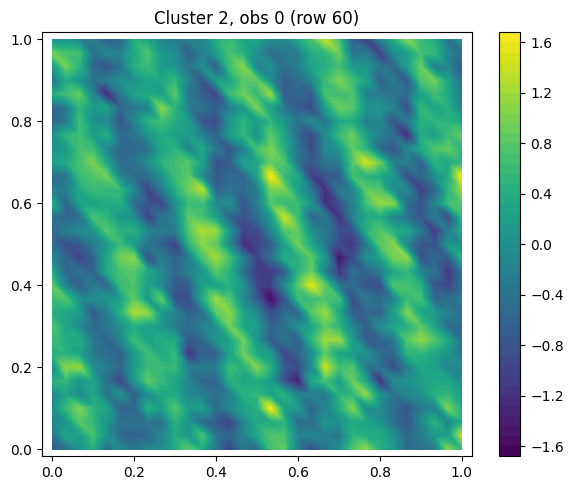

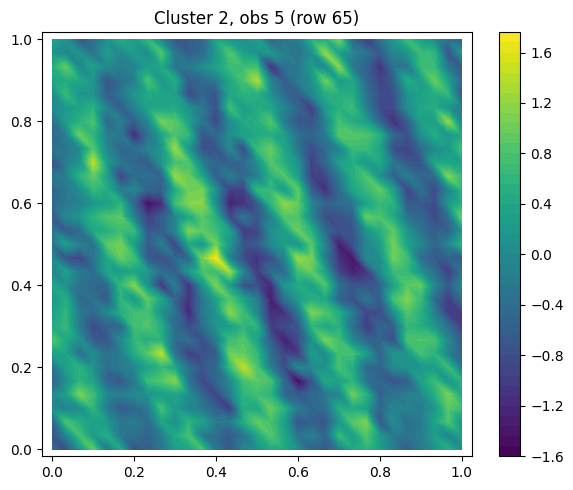

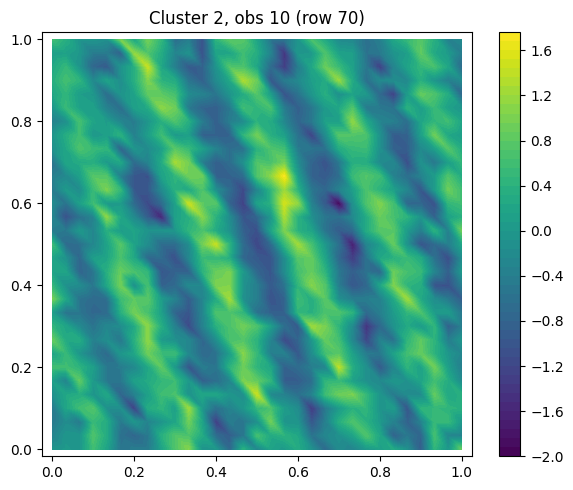

In [9]:
# --- Cell 9 (optional): plot some observations per cluster if you know n_obs_per_clust ---
n_obs_per_clust = 30  # EDIT if different
k = 3                 # EDIT if different

# Example: plot obs 0,5,10 for each cluster
within = [0, 5, 10]

for cl in range(k):
    for i in within:
        idx = cl * n_obs_per_clust + i
        if idx < Y.shape[0]:
            plot_on_mesh(Y[idx, :], title=f"Cluster {cl}, obs {i} (row {idx})")
